# ============================================================================
# PROJETO: DETECÇÃO DE FRAUDES EM CARTÕES DE CRÉDITO
# Notebook 01: Exploração Inicial dos Dados
# Autor: Fernando Batista
# Data: 2025
# ============================================================================


# 🎯 Detecção de Fraudes em Cartões de Crédito

## Objetivo do Projeto
Desenvolver um sistema de Machine Learning para identificar transações 
fraudulentas em cartões de crédito, minimizando perdas financeiras e 
melhorando a experiência do cliente.

## Dataset
- **Fonte**: Kaggle - Credit Card Fraud Detection
- **URL**: https://www.kaggle.com/mlg-ulb/creditcardfraud
- **Período**: Transações realizadas por cartões de crédito europeus em setembro de 2013
- **Tamanho**: 284,807 transações

### 📦 1. Importação de Bibliotecas  

In [5]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configurações
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Para notebook
from IPython.display import display, HTML

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!



### 📥 2. Carregamento dos Dados

**Importante**: Baixe o dataset do Kaggle:
1. Acesse: https://www.kaggle.com/mlg-ulb/creditcardfraud
2. Clique em "Download"
3. Extraia o arquivo `creditcard.csv`
4. Coloque na pasta `data/raw/`


In [6]:
# Caminho do arquivo
file_path = '../data/raw/creditcard.csv'

# Carregamento com indicador de progresso
print("📂 Carregando dataset...")
df = pd.read_csv(file_path)
print(f"✅ Dataset carregado com sucesso!")
print(f"📊 Dimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")

📂 Carregando dataset...
✅ Dataset carregado com sucesso!
📊 Dimensões: 284,807 linhas × 31 colunas


### 🔍 3. Visão Geral dos Dados

In [7]:
# Primeiras linhas
print("=" * 80)
print("🔝 PRIMEIRAS 5 TRANSAÇÕES")
print("=" * 80)
display(df.head())

🔝 PRIMEIRAS 5 TRANSAÇÕES


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Informações gerais
print("\n" + "=" * 80)
print("📋 INFORMAÇÕES DO DATASET")
print("=" * 80)
df.info()



📋 INFORMAÇÕES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nul

In [9]:

# Estatísticas descritivas
print("\n" + "=" * 80)
print("📊 ESTATÍSTICAS DESCRITIVAS")
print("=" * 80)
display(df.describe().T)



📊 ESTATÍSTICAS DESCRITIVAS


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 🎯 4. Análise da Variável Alvo (Class)

🎯 DISTRIBUIÇÃO DE FRAUDES

📌 Transações Legítimas: 284,315 (99.827%)
🚨 Transações Fraudulentas: 492 (0.173%)

⚠️  Razão de Desbalanceamento: 1:578


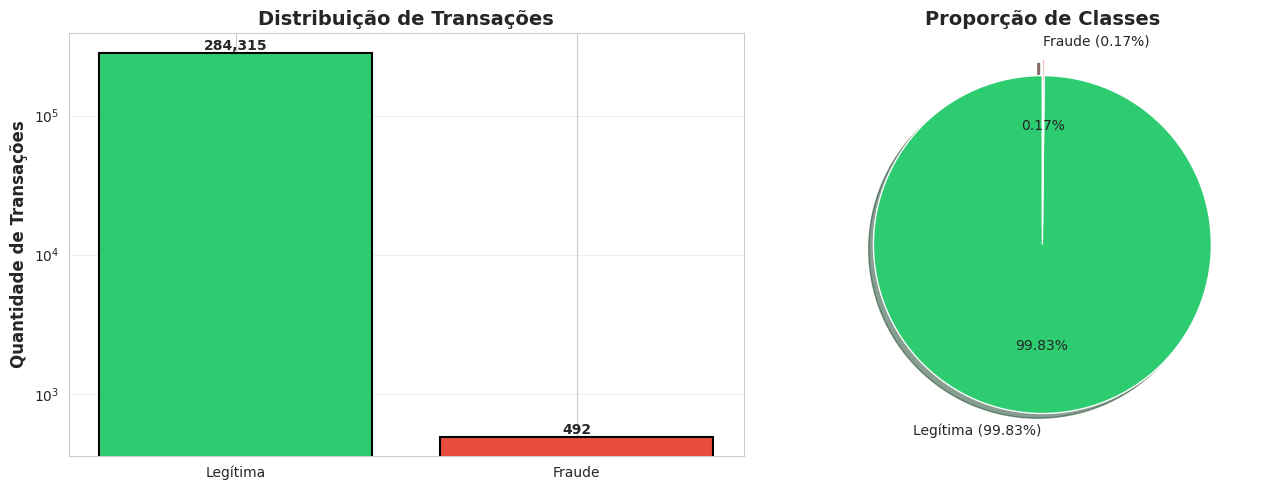


💾 Gráfico salvo em: images/01_class_distribution.png


In [10]:
# Distribuição de fraudes
print("=" * 80)
print("🎯 DISTRIBUIÇÃO DE FRAUDES")
print("=" * 80)

fraude_counts = df['Class'].value_counts()
fraude_pct = df['Class'].value_counts(normalize=True) * 100

print(f"\n📌 Transações Legítimas: {fraude_counts[0]:,} ({fraude_pct[0]:.3f}%)")
print(f"🚨 Transações Fraudulentas: {fraude_counts[1]:,} ({fraude_pct[1]:.3f}%)")
print(f"\n⚠️  Razão de Desbalanceamento: 1:{fraude_counts[0]/fraude_counts[1]:.0f}")

# Visualização da distribuição
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['Legítima', 'Fraude'], fraude_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Quantidade de Transações', fontsize=12, fontweight='bold')
axes[0].set_title('Distribuição de Transações', fontsize=14, fontweight='bold')
axes[0].set_yscale('log')  # Escala logarítmica para melhor visualização
axes[0].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(fraude_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Gráfico de pizza
axes[1].pie(fraude_counts.values, labels=['Legítima (99.83%)', 'Fraude (0.17%)'], 
            colors=colors, autopct='%1.2f%%', startangle=90,
            explode=(0, 0.1), shadow=True)
axes[1].set_title('Proporção de Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico salvo em: images/01_class_distribution.png")

⏰ ANÁLISE TEMPORAL

📊 Duração total do dataset: 48.0 horas
📊 Equivalente a: 2.0 dias


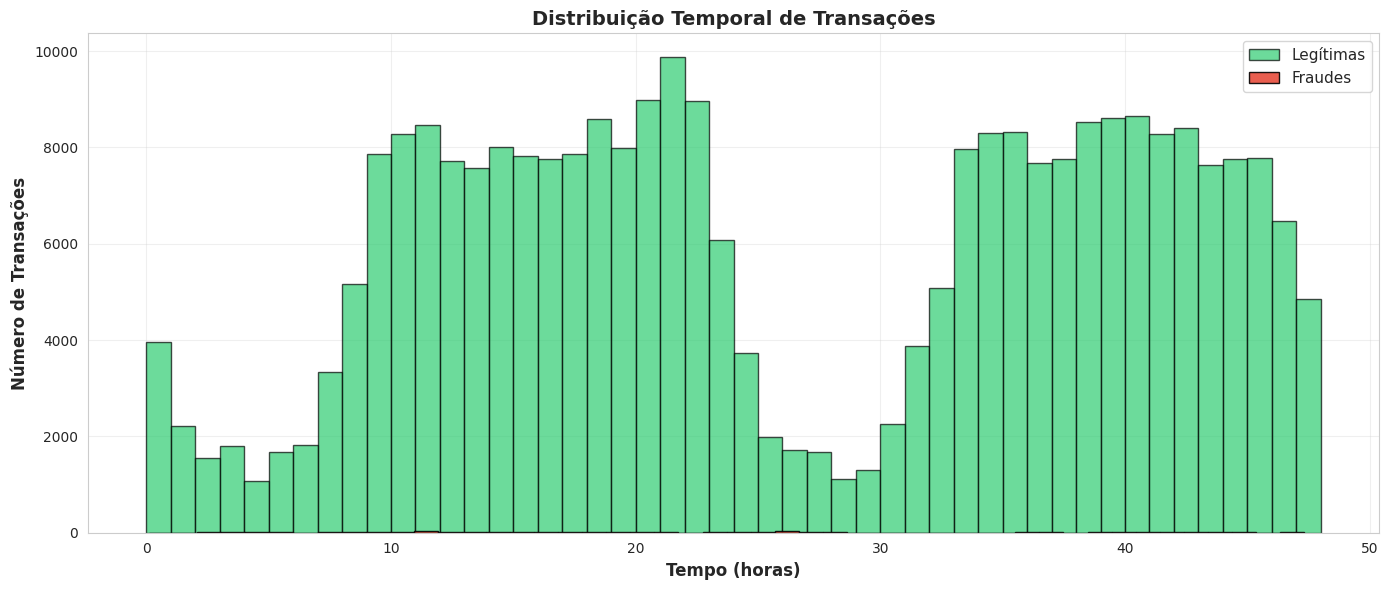


💾 Gráfico salvo em: images/02_temporal_distribution.png
💰 ANÁLISE DE VALORES DAS TRANSAÇÕES

📊 TRANSAÇÕES LEGÍTIMAS:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

🚨 TRANSAÇÕES FRAUDULENTAS:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


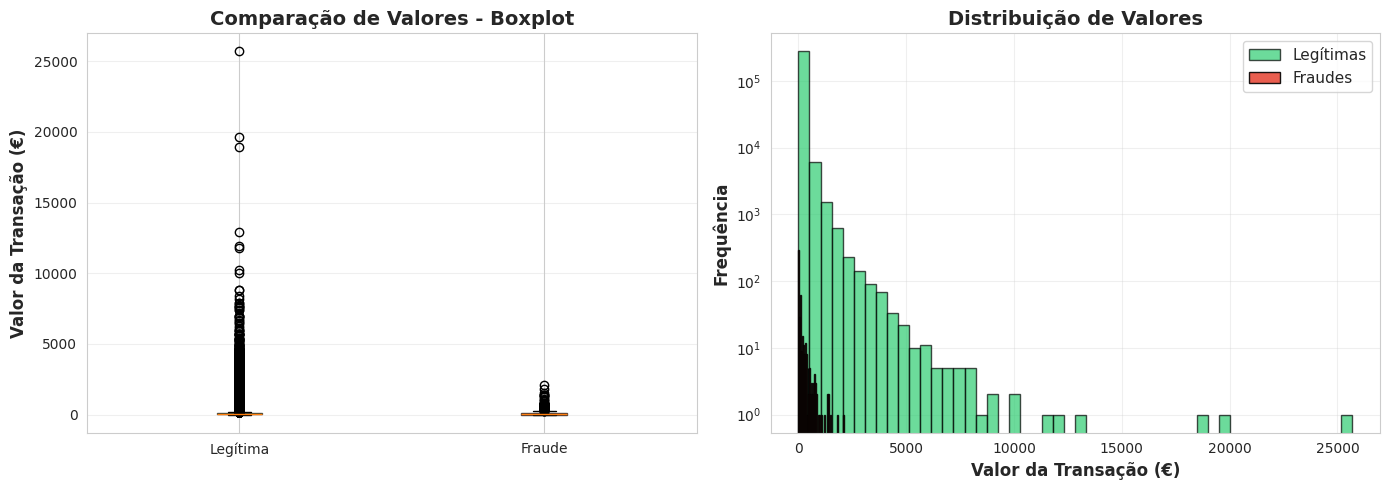


💾 Gráfico salvo em: images/03_amount_distribution.png
🔍 VERIFICAÇÃO DE QUALIDADE DOS DADOS

✅ Valores ausentes: 0
✅ Linhas duplicadas: 1081

📊 VALORES ÚNICOS POR COLUNA:
  • Time: 124,592 valores únicos
  • V1: 275,663 valores únicos
  • V2: 275,663 valores únicos
  • V3: 275,663 valores únicos
  • V4: 275,663 valores únicos
  • V5: 275,663 valores únicos
  • V6: 275,663 valores únicos
  • V7: 275,663 valores únicos
  • V8: 275,663 valores únicos
  • V9: 275,663 valores únicos
  • V10: 275,663 valores únicos
  • V11: 275,663 valores únicos
  • V12: 275,663 valores únicos
  • V13: 275,663 valores únicos
  • V14: 275,663 valores únicos
  • V15: 275,663 valores únicos
  • V16: 275,663 valores únicos
  • V17: 275,663 valores únicos
  • V18: 275,663 valores únicos
  • V19: 275,663 valores únicos
  • V20: 275,663 valores únicos
  • V21: 275,663 valores únicos
  • V22: 275,663 valores únicos
  • V23: 275,663 valores únicos
  • V24: 275,663 valores únicos
  • V25: 275,663 valores únicos
  • V

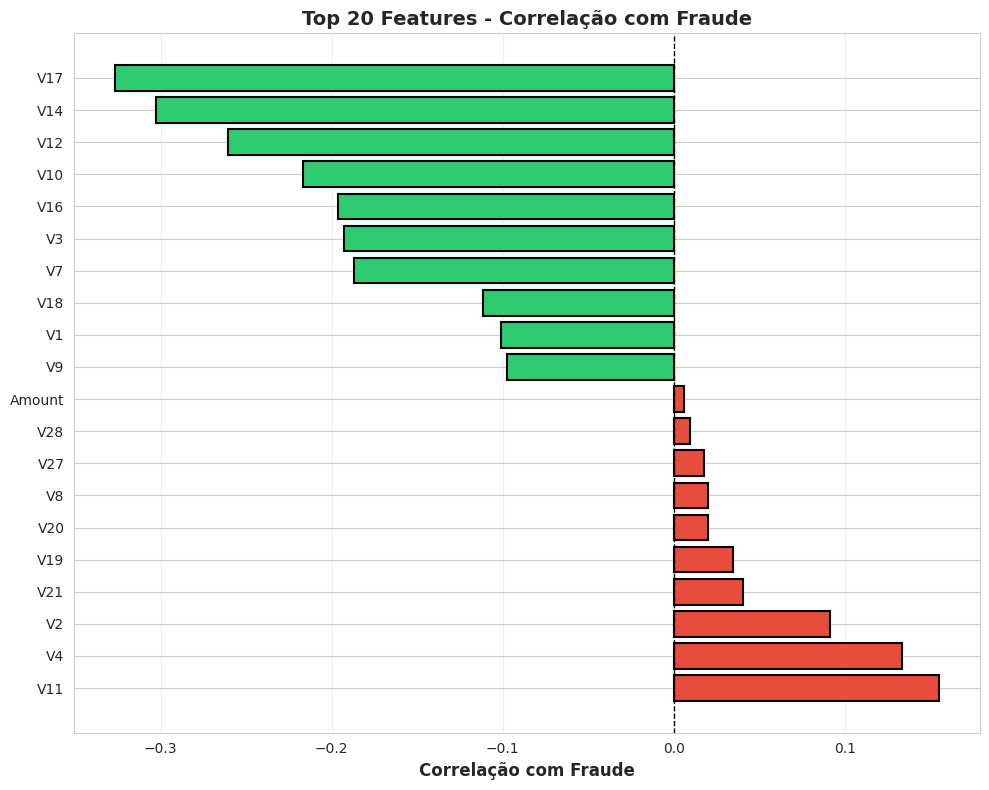


💾 Gráfico salvo em: images/04_correlation_top20.png


In [11]:
# %% [markdown]
# ## ⏰ 5. Análise Temporal (Time)

# %%
# Convertendo segundos para horas
df['Time_Hours'] = df['Time'] / 3600

# Estatísticas temporais
print("=" * 80)
print("⏰ ANÁLISE TEMPORAL")
print("=" * 80)
print(f"\n📊 Duração total do dataset: {df['Time_Hours'].max():.1f} horas")
print(f"📊 Equivalente a: {df['Time_Hours'].max()/24:.1f} dias")

# %%
# Distribuição temporal de fraudes vs legítimas
fig, ax = plt.subplots(figsize=(14, 6))

# Separar dados
legitimate = df[df['Class'] == 0]['Time_Hours']
fraud = df[df['Class'] == 1]['Time_Hours']

# Criar histogramas
ax.hist(legitimate, bins=48, alpha=0.7, label='Legítimas', color='#2ecc71', edgecolor='black')
ax.hist(fraud, bins=48, alpha=0.9, label='Fraudes', color='#e74c3c', edgecolor='black')

ax.set_xlabel('Tempo (horas)', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Transações', fontsize=12, fontweight='bold')
ax.set_title('Distribuição Temporal de Transações', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../images/02_temporal_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico salvo em: images/02_temporal_distribution.png")

# %% [markdown]
# ## 💰 6. Análise de Valores (Amount)

# %%
# Estatísticas de valores
print("=" * 80)
print("💰 ANÁLISE DE VALORES DAS TRANSAÇÕES")
print("=" * 80)

print("\n📊 TRANSAÇÕES LEGÍTIMAS:")
print(df[df['Class'] == 0]['Amount'].describe())

print("\n🚨 TRANSAÇÕES FRAUDULENTAS:")
print(df[df['Class'] == 1]['Amount'].describe())

# %%
# Comparação de valores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
data_to_plot = [df[df['Class'] == 0]['Amount'], df[df['Class'] == 1]['Amount']]
bp = axes[0].boxplot(data_to_plot, labels=['Legítima', 'Fraude'], patch_artist=True)

# Colorir os boxplots
colors = ['#2ecc71', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[0].set_ylabel('Valor da Transação (€)', fontsize=12, fontweight='bold')
axes[0].set_title('Comparação de Valores - Boxplot', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Histograma (log scale)
axes[1].hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.7, 
             label='Legítimas', color='#2ecc71', edgecolor='black')
axes[1].hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.9, 
             label='Fraudes', color='#e74c3c', edgecolor='black')
axes[1].set_xlabel('Valor da Transação (€)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequência', fontsize=12, fontweight='bold')
axes[1].set_title('Distribuição de Valores', fontsize=14, fontweight='bold')
axes[1].set_yscale('log')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../images/03_amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico salvo em: images/03_amount_distribution.png")

# %% [markdown]
# ## 🔍 7. Valores Ausentes e Duplicados

# %%
print("=" * 80)
print("🔍 VERIFICAÇÃO DE QUALIDADE DOS DADOS")
print("=" * 80)

# Valores ausentes
missing = df.isnull().sum()
print(f"\n✅ Valores ausentes: {missing.sum()}")

# Duplicados
duplicates = df.duplicated().sum()
print(f"✅ Linhas duplicadas: {duplicates}")

# Valores únicos por coluna
print("\n📊 VALORES ÚNICOS POR COLUNA:")
for col in df.columns:
    print(f"  • {col}: {df[col].nunique():,} valores únicos")

# %% [markdown]
# ## 📊 8. Matriz de Correlação (Preview)

# %%
# Correlação das features com a variável alvo
correlations = df.corr()['Class'].drop('Class').sort_values(ascending=False)

print("=" * 80)
print("📊 TOP 10 FEATURES MAIS CORRELACIONADAS COM FRAUDE")
print("=" * 80)
print("\n🔺 CORRELAÇÃO POSITIVA (indicam fraude):")
print(correlations.head(5))
print("\n🔻 CORRELAÇÃO NEGATIVA (indicam legitimidade):")
print(correlations.tail(5))

# %%
# Visualização das top correlações
fig, ax = plt.subplots(figsize=(10, 8))

top_corr = pd.concat([correlations.head(10), correlations.tail(10)])
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_corr.values]

ax.barh(range(len(top_corr)), top_corr.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(top_corr)))
ax.set_yticklabels(top_corr.index)
ax.set_xlabel('Correlação com Fraude', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Features - Correlação com Fraude', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../images/04_correlation_top20.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico salvo em: images/04_correlation_top20.png")

# %% [markdown]
# ## 📝 9. Primeiras Conclusões
# 
# ### ✅ O que aprendemos:
# 
# 1. **Desbalanceamento Severo**: 
#    - Apenas 0.17% das transações são fraudulentas
#    - Razão de ~577:1 (legítimas:fraudes)
#    - ⚠️ Isso exigirá técnicas especiais de balanceamento!
# 
# 2. **Padrão Temporal**:
#    - Fraudes ocorrem ao longo de todo o período
#    - Possível concentração em certos horários (investigar mais)
# 
# 3. **Valores das Transações**:
#    - Fraudes tendem a ter valores menores
#    - Grande variabilidade em ambas as classes
# 
# 4. **Qualidade dos Dados**:
#    - ✅ Sem valores ausentes
#    - ✅ Sem duplicados
#    - ✅ Dataset limpo e pronto para análise
# 
# 5. **Features Importantes**:
#    - V14, V4, V11 têm forte correlação negativa com fraude
#    - V17, V12, V10 têm correlação positiva
#    - Features PCA já processadas (V1-V28)
# 
# ### 🎯 Próximos Passos:
# 
# 1. ✅ Análise exploratória aprofundada (EDA)
# 2. ✅ Feature engineering
# 3. ✅ Tratamento de desbalanceamento
# 4. ✅ Modelagem com múltiplos algoritmos
# 5. ✅ Avaliação focada em Recall (detectar fraudes!)

# %% [markdown]
# ---
# **Notebook criado por**: [Seu Nome]  
# **GitHub**: [seu-usuario]  
# **LinkedIn**: [seu-perfil]  
# **Data**: Setembro 2025